In [1]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/asus/G_school_lectures/Week_7_Lectures/svd/data/book_reviews.csv')

In [3]:
df.head()

,User-ID,ISBN,Book-Rating
0,277195,0060391626,10
1,277195,0060502258,0
2,277195,0060987561,0
3,277195,0316666343,0
4,277195,0316734837,0


In [4]:
df = df.pivot(index='User-ID', columns='ISBN', values='Book-Rating')

In [5]:
df = df.fillna(value=-1)

In [6]:
df.head()

ISBN,0006493580,000649840X,0006512135,0006513204,0006514855,0006547834,0006550576,0006550681,0006550789,0007110928,...,8495618605,8497593588,8804342838,8806142100,8806143042,8807813025,8817106100,8845205118,8873122933,8885989403
User-ID,,,,,,,,,,,,,,,,,,,,,
243,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
254,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
507,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
638,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
805,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [7]:
# Number of Users
m = df.shape[0] ; m

2500

In [8]:
# Number of items (books)
n = df.shape[1] ; n

6092

In [9]:
# matrix (m X n) user-book rating
A = df.values

In [10]:
# number of latent features also the rank of A
k = linalg.matrix_rank(A)

In [11]:
U, sigma, VT = linalg.svd(A)

In [12]:
U

array([[-2.03396597e-02,  3.27259280e-03, -5.59539999e-03, ...,
        -4.04661484e-03,  7.17809579e-03, -1.01455610e-03],
       [-1.99587717e-02,  5.08901334e-03, -1.24744002e-02, ...,
        -2.25695189e-03, -2.74615838e-03,  5.37125774e-04],
       [-2.02107574e-02, -3.07725219e-03,  2.03474407e-03, ...,
        -1.24645535e-03,  3.76957844e-04,  4.72651580e-04],
       ...,
       [-2.04464615e-02, -2.06253309e-03,  5.15836337e-03, ...,
         1.74361471e-03, -1.34095166e-03,  3.66987228e-04],
       [-2.01564057e-02,  3.00546220e-03, -9.86436564e-03, ...,
         4.05579872e-03, -1.51472219e-05, -1.49642948e-03],
       [-2.05107697e-02,  9.83573128e-04, -1.35932591e-03, ...,
         5.83260439e-03,  5.99983996e-04,  3.18198131e-03]])

First calculate the power that each singular value represents. Power is the same as variance of a dimension and we can compute it simply by squaring the singular values.

In [13]:
sigma_sq = sigma**2
U_sq = U**2
VT_sq = VT**2


In [14]:
sigma.shape

(2500,)

Total power is the sum of the power of each singular value. Plot the power of each singular value and look for the 'elbow'. How many singular values should you keep?

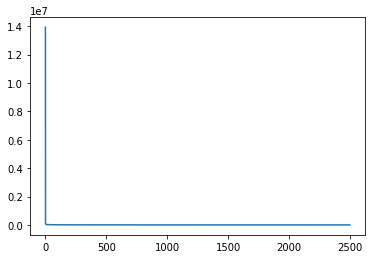

In [15]:
plt.plot(sigma ** 2);

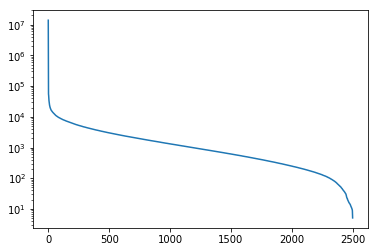

In [16]:
plt.plot(sigma ** 2)
plt.yscale('log');

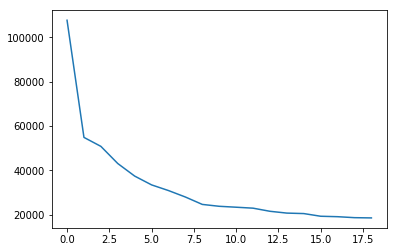

In [17]:
plt.plot(sigma[1:20] ** 2);

The reason we might be interested in total power is to have some sense of the information loss of our transformation. Plot how the total power varies as you add additional singular values, i.e. plot total power of SV12, SV12 + SV22, SV12 + SV22 + SV32, etc. This is equivalent to the cumulative sum of the squares of the singular values.

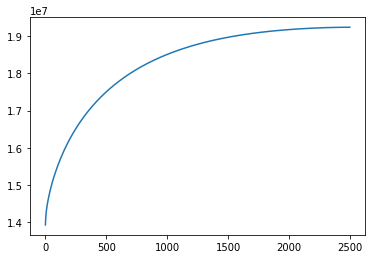

In [18]:
cumulative = np.cumsum(sigma ** 2)
plt.plot(cumulative);

In [19]:
total_power = np.sum(sigma ** 2)

### Calculate total Sum

In [20]:
total_power = np.sum(sigma**2)

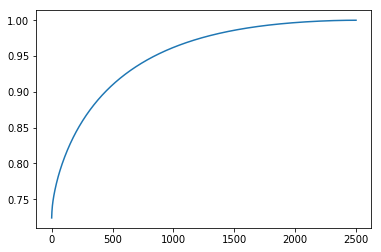

In [22]:
plt.plot(cumulative/total_power)

#### How many singular values do you need to keep to retain 90% of the total power?

In [23]:
total_power * .9

17314294.50000011

In [24]:
# looks like ~440
cumulative[425:445]

array([17261873.92349745, 17265354.08239692, 17268816.13136254,
       17272273.69115407, 17275722.03438535, 17279165.46728184,
       17282599.88202254, 17286020.7048028 , 17289440.27780606,
       17292852.56226971, 17296256.79602877, 17299656.24063952,
       17303052.33343225, 17306439.78265796, 17309814.71885886,
       17313189.45027931, 17316559.90856218, 17319922.37561766,
       17323274.23944463, 17326613.64580782])

In [25]:
cumulative[425:445]/total_power

array([0.89727517, 0.89745607, 0.89763603, 0.89781575, 0.897995  ,
       0.89817399, 0.89835251, 0.89853032, 0.89870807, 0.89888544,
       0.8990624 , 0.8992391 , 0.89941563, 0.89959171, 0.89976714,
       0.89994256, 0.90011776, 0.90029254, 0.90046677, 0.90064035])

Pick a number of singular values to keep (you'll be evaluating latent topics by eye, so keep it to 10 or so). Look at V to find which books most contribute to each 'topic'. For each of these 'topics', print out the title and author of the 10 most relevant books. Note: You can get the book metadata from the data/book_meta.csv file Use:

In [30]:
# topic matrix has the length of the number of books analoglous to
# ncomponents but each componenet also has the total number of books 
# as a measure to say if this book is in this topic
# item based approached
V_10 = VT[:10,:]

In [32]:
# total user matrix, for a user based approach
U_10 = U[:,:10]

In [34]:
books = pd.read_csv('/home/asus/G_school_lectures/Week_7_Lectures/svd/data/book_meta.csv', sep=";", error_bad_lines=False, encoding='latin1')

In [35]:
books = books.set_index('ISBN')

In [36]:
books

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,two,three
ISBN,,,,,,,,,
0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN
0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN,NaN
0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN,NaN
0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,NaN,NaN
0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN,NaN
0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,NaN,NaN
0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,NaN,NaN
0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,NaN,NaN
0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,NaN,NaN


In [53]:
V_10

array([[ 0.0131897 ,  0.01282525,  0.01330851, ...,  0.01335105,
         0.0133207 ,  0.01336193],
       [-0.00760107,  0.01572755, -0.01055016, ..., -0.01050403,
        -0.0074521 , -0.00762351],
       [-0.00183887, -0.00183146, -0.00221251, ..., -0.001974  ,
        -0.00195109, -0.00154018],
       ...,
       [-0.00107762, -0.00260133, -0.00102988, ..., -0.00061705,
        -0.00094707, -0.00052436],
       [ 0.00030146,  0.00034192,  0.00245414, ...,  0.00221397,
         0.00167134,  0.00218588],
       [-0.00031477, -0.00070455,  0.00057571, ...,  0.00054431,
         0.00068703,  0.00058865]])

In [63]:
len(V_10[0])

6092

In [67]:
def print_titles(topic, n):
    # grabs index of original dataframe ordered by strength given by V_10 topic
    idx = np.argsort(topic)
    # actaully grabs the sort and reverses it 
    reverse_idx = idx[::-1]
    
    # i is the IBSN number in original dataframe as indexed by strength
    # n is the number of books you want per topic
    for i in df.columns[reverse_idx[:n]]:
        try:
            # prints book title and book author
            print(books.loc[i, 'Book-Title'] + ' : ' + books.loc[i,'Book-Author'])
        except Exception:
            continue

In [68]:
for i in range(len(V_10)):
    print("Topic #{} :".format(i))
    print("\n")
    print_titles(np.abs(V_10[i]), 10)
    print("\n")

Topic #0 :


Name Der Rose : Umberto Eco
Monsieur Ibrahim und die Blumen des Koran. ErzÃ?Â¤hlung. : Eric-Emmanuel Schmitt
Artemis Fowl. : Eoin Colfer
Novocento, Un Monologo : Alessandro Baricco
Schlafes Bruder : Robert Schneider
New Vegetarian: Bold and Beautiful Recipes for Every Occasion : Celia Brooks Brown
Der Alchimist. : Paulo Coelho
Die Weiss Lowin / Contemporary German Lit : Henning Mankell
Crazy : Benjamin Lebert
Free : Paul Vincent


Topic #1 :


The Red Tent (Bestselling Backlist) : Anita Diamant
The Lovely Bones: A Novel : Alice Sebold
The Da Vinci Code : Dan Brown
Where the Heart Is (Oprah's Book Club (Paperback)) : Billie Letts
Two for the Dough : Janet Evanovich
Snow Falling on Cedars : David Guterson
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) : J. K. Rowling
1st to Die: A Novel : James Patterson
Good in Bed : Jennifer Weiner
Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson : MITCH ALBOM


Topic #2 :


The Red Tent (Bestsell

In [81]:
U_10[10]

array([-0.0201408 , -0.00223834,  0.01898822, -0.0029284 ,  0.00112286,
       -0.00831398, -0.00570565, -0.00740375,  0.00962044, -0.00969546])

In [82]:
U_10[0].argmax()

5

In [84]:
print_titles(V_10[5], 15)

The Lovely Bones: A Novel : Alice Sebold
The Da Vinci Code : Dan Brown
To the Nines: A Stephanie Plum Novel : Janet Evanovich
The Five People You Meet in Heaven : Mitch Albom
1st to Die: A Novel : James Patterson
The Last Juror : John Grisham
2nd Chance : James Patterson
Four Blind Mice : James Patterson
No Second  Chance : Harlan Coben
Full House (Janet Evanovich's Full Series) : Janet Evanovich
Seven Up (A Stephanie Plum Novel) : Janet Evanovich
The Lake House : James Patterson
Blow Fly: A Scarpetta Novel : Patricia Cornwell
Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel) : Janet Evanovich
From a Buick 8 : A Novel : Stephen King


## Extra Credit

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import *
from sklearn.manifold import MDS
from statsmodels.iolib.foreign import genfromdta
import os
from scipy.spatial import distance
import re
import math



In [86]:
cong = {}

for file_n in os.listdir('/home/asus/G_school_lectures/Week_7_Lectures/svd/data/senate'):
    senate = file_n.split('.')[0]
    cong[senate] = pd.read_csv('/home/asus/G_school_lectures/Week_7_Lectures/svd/data/senate/' + file_n)


In [88]:
cong['s101'].head()

,Unnamed: 0,cong,id,state,dist,lstate,party,eh1,eh2,name,...,V629,V630,V631,V632,V633,V634,V635,V636,V637,V638
0,1,101,99908,99,0,USA,200,0,0,BUSH,...,9,9,9,9,9,9,9,9,9,1
1,2,101,14659,41,0,ALABAMA,100,0,1,"SHELBY, RIC",...,1,1,1,1,1,1,1,1,1,6
2,3,101,14705,41,0,ALABAMA,100,0,1,"HEFLIN, HOW",...,1,1,1,1,1,1,1,1,1,6
3,4,101,12109,81,0,ALASKA,200,0,1,"STEVENS, TH",...,1,1,1,1,6,6,1,1,1,1
4,5,101,14907,81,0,ALASKA,200,0,1,"MURKOWSKI,",...,1,1,1,1,6,6,1,1,1,6


In [94]:
def transformers(df):
    cols = [col for col in df.columns if col[0].lower() =='v']
    df[cols] = df[cols].applymap(lambda x: mapping[x])
for k in cong:
    transformers(cong[k])

KeyError: (-1, 'occurred at index V4')

In [96]:
cong[k].head()

,Unnamed: 0,cong,id,state,dist,lstate,party,eh1,eh2,name,...,V603,V604,V605,V606,V607,V608,V609,V610,V611,V612
0,1,105,99909,99,0,USA,100,0,0,CLINTON,...,0,0,0,0,1,0,0,0,0,0
1,2,105,49700,41,0,ALABAMA,200,0,1,SESSIONS,...,-1,-1,1,1,-1,1,1,1,1,-1
2,3,105,94659,41,0,ALABAMA,200,0,1,SHELBY,...,1,1,1,1,-1,1,1,1,1,1
3,4,105,14907,81,0,ALASKA,200,0,1,MURKOWSKI,...,1,1,1,1,-1,1,1,1,1,0
4,5,105,12109,81,0,ALASKA,200,0,1,STEVENS,...,1,1,1,1,1,1,1,1,1,1


In [105]:
roll = cong['s101']
# capture attendance columns for specific congress
cols = [c for c in roll.columns if c[0].lower() =='v']
dist = distance.pdist(roll[cols], metric='euclidean')
mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(dist))

names = roll.name.values
# capture dems and repubs row values 
dem = np.where(roll.party == 100)[0]
rep = np.where(roll.party == 200)[0]

def plot_senate(mds):
    plt.figure(figsize = (12, 10))

    plt.plot(mds[:, 0], mds[:, 1], '.', alpha = 0)

    plt.title('Senators of the 101th Congress')

    for i in dem:
        plt.annotate(names[i], (mds[i, 0], mds[i, 1]),
                     color = 'blue',
                     alpha = 0.3)

    for i in rep:
        plt.annotate(names[i], (mds[i, 0], mds[i, 1]),
                     color = 'red',
                     alpha = 0.5)


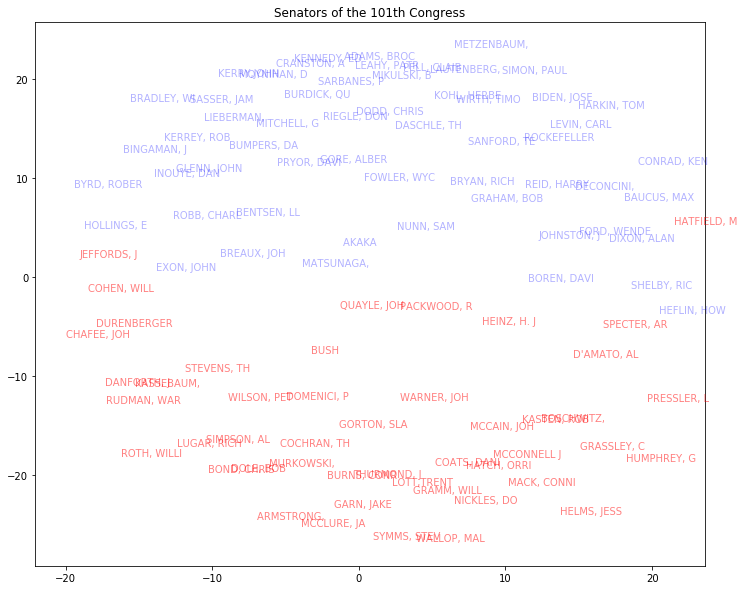

In [106]:
plot_senate(mds)